In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [4]:
m = pd.read_csv(r"C:\Users\phani\OneDrive\Documents\Machine learning internship\Project\cards.csv", header=0)

# Copy the file to back-up file

m_bk = m.copy()

# display first 5 records

m.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0


In [5]:
m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  int64  
 4   used_chip                       1000000 non-null  int64  
 5   used_pin_number                 1000000 non-null  int64  
 6   online_order                    1000000 non-null  int64  
 7   fraud                           1000000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 61.0 MB


In [6]:
m.nunique()

distance_from_home                999971
distance_from_last_transaction    999836
ratio_to_median_purchase_price    999808
repeat_retailer                        2
used_chip                              2
used_pin_number                        2
online_order                           2
fraud                                  2
dtype: int64

In [7]:
m.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [8]:
cat=['used_chip','used_pin_number','online_order','repeat_retailer']
m=pd.get_dummies(m,columns=cat)
m.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,fraud,used_chip_0,used_chip_1,used_pin_number_0,used_pin_number_1,online_order_0,online_order_1,repeat_retailer_0,repeat_retailer_1
0,57.877857,0.311140,1.945940,0,0,1,1,0,1,0,0,1
1,10.829943,0.175592,1.294219,0,1,0,1,0,1,0,0,1
2,5.091079,0.805153,0.427715,0,1,0,1,0,0,1,0,1
3,2.247564,5.600044,0.362663,0,0,1,1,0,0,1,0,1
4,44.190936,0.566486,2.222767,0,0,1,1,0,0,1,0,1


In [9]:
IndepVar = []
for col in m.columns:
    if col != 'fraud':
        IndepVar.append(col)

TargetVar = 'fraud'

x = m[IndepVar]
y = m[TargetVar]

In [10]:
x.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,used_chip_0,used_chip_1,used_pin_number_0,used_pin_number_1,online_order_0,online_order_1,repeat_retailer_0,repeat_retailer_1
0,57.877857,0.311140,1.945940,0,1,1,0,1,0,0,1
1,10.829943,0.175592,1.294219,1,0,1,0,1,0,0,1
2,5.091079,0.805153,0.427715,1,0,1,0,0,1,0,1
3,2.247564,5.600044,0.362663,0,1,1,0,0,1,0,1
4,44.190936,0.566486,2.222767,0,1,1,0,0,1,0,1


In [11]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: fraud, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, stratify=y, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((800000, 11), (200000, 11), (800000,), (200000,))

In [13]:
from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

In [14]:
EMResults = pd.read_csv(r"C:\Users\phani\OneDrive\Documents\Machine learning internship\HTResults.csv", header=0)
EMResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[ 15316   2165]
 [  9363 173156]]
Outcome values : 
 15316 2165 9363 173156
Classification report : 
               precision    recall  f1-score   support

           1       0.62      0.88      0.73     17481
           0       0.99      0.95      0.97    182519

    accuracy                           0.94    200000
   macro avg       0.80      0.91      0.85    200000
weighted avg       0.96      0.94      0.95    200000

Accuracy : 94.2 %
Precision : 62.1 %
Recall : 87.6 %
F1 Score : 0.727
Specificity or True Negative Rate : 94.9 %
Balanced Accuracy : 91.2 %
MCC : 1.222
roc_auc_score: 0.912


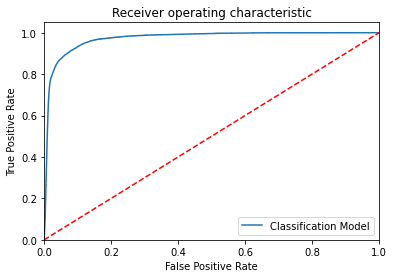

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[ 17449     32]
 [ 28730 153789]]
Outcome values : 
 17449 32 28730 153789
Classification report : 
               precision    recall  f1-score   support

           1       0.38      1.00      0.55     17481
           0       1.00      0.84      0.91    182519

    accuracy                           0.86    200000
   macro avg       0.69      0.92      0.73    200000
weighted avg       0.95      0.86      0.88    200000

Accuracy : 85.6 %
Precision : 37.8 %
Recall : 99.8 %
F1 Score : 0.548
Specificity or True Negative Rate : 84.3 %
Balanced Accuracy : 92.0 %
MCC : 1.306
roc_auc_score: 0.92


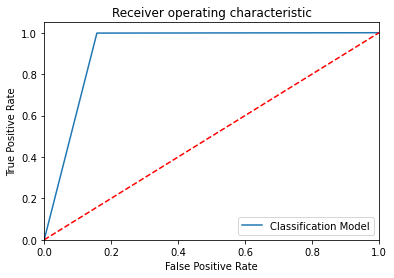

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[ 17478      3]
 [ 28866 153653]]
Outcome values : 
 17478 3 28866 153653
Classification report : 
               precision    recall  f1-score   support

           1       0.38      1.00      0.55     17481
           0       1.00      0.84      0.91    182519

    accuracy                           0.86    200000
   macro avg       0.69      0.92      0.73    200000
weighted avg       0.95      0.86      0.88    200000

Accuracy : 85.6 %
Precision : 37.7 %
Recall : 100.0 %
F1 Score : 0.548
Specificity or True Negative Rate : 84.2 %
Balanced Accuracy : 92.1 %
MCC : 1.299
roc_auc_score: 0.921


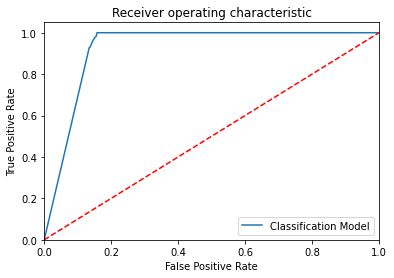

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[ 17462     19]
 [ 28394 154125]]
Outcome values : 
 17462 19 28394 154125
Classification report : 
               precision    recall  f1-score   support

           1       0.38      1.00      0.55     17481
           0       1.00      0.84      0.92    182519

    accuracy                           0.86    200000
   macro avg       0.69      0.92      0.73    200000
weighted avg       0.95      0.86      0.88    200000

Accuracy : 85.8 %
Precision : 38.1 %
Recall : 99.9 %
F1 Score : 0.551
Specificity or True Negative Rate : 84.4 %
Balanced Accuracy : 92.2 %
MCC : 1.328
roc_auc_score: 0.922


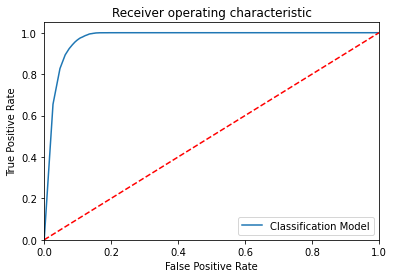

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[ 17408     73]
 [ 27954 154565]]
Outcome values : 
 17408 73 27954 154565
Classification report : 
               precision    recall  f1-score   support

           1       0.38      1.00      0.55     17481
           0       1.00      0.85      0.92    182519

    accuracy                           0.86    200000
   macro avg       0.69      0.92      0.74    200000
weighted avg       0.95      0.86      0.89    200000

Accuracy : 86.0 %
Precision : 38.4 %
Recall : 99.6 %
F1 Score : 0.554
Specificity or True Negative Rate : 84.7 %
Balanced Accuracy : 92.2 %
MCC : 1.355
roc_auc_score: 0.921


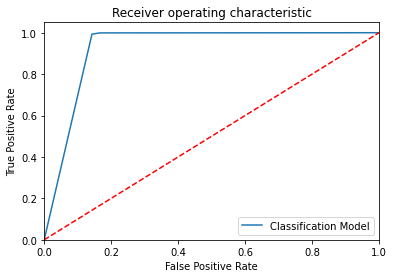

-----------------------------------------------------------------------------------------------------
Model Name:  BaggingClassifier(n_estimators=100)
Confusion matrix : 
 [[ 17480      1]
 [ 28902 153617]]
Outcome values : 
 17480 1 28902 153617
Classification report : 
               precision    recall  f1-score   support

           1       0.38      1.00      0.55     17481
           0       1.00      0.84      0.91    182519

    accuracy                           0.86    200000
   macro avg       0.69      0.92      0.73    200000
weighted avg       0.95      0.86      0.88    200000

Accuracy : 85.5 %
Precision : 37.7 %
Recall : 100.0 %
F1 Score : 0.547
Specificity or True Negative Rate : 84.2 %
Balanced Accuracy : 92.1 %
MCC : 1.297
roc_auc_score: 0.921


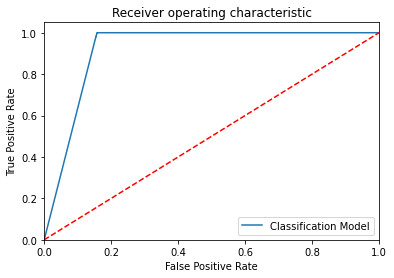

-----------------------------------------------------------------------------------------------------
Model Name:  GradientBoostingClassifier()
Confusion matrix : 
 [[ 17397     84]
 [ 28136 154383]]
Outcome values : 
 17397 84 28136 154383
Classification report : 
               precision    recall  f1-score   support

           1       0.38      1.00      0.55     17481
           0       1.00      0.85      0.92    182519

    accuracy                           0.86    200000
   macro avg       0.69      0.92      0.73    200000
weighted avg       0.95      0.86      0.88    200000

Accuracy : 85.9 %
Precision : 38.2 %
Recall : 99.5 %
F1 Score : 0.552
Specificity or True Negative Rate : 84.6 %
Balanced Accuracy : 92.0 %
MCC : 1.343
roc_auc_score: 0.921


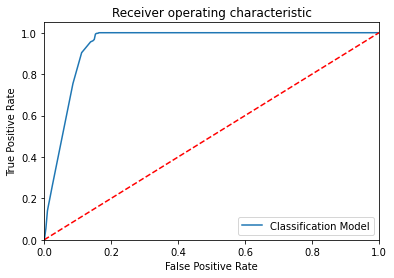

-----------------------------------------------------------------------------------------------------
Model Name:  LGBMClassifier()
Confusion matrix : 
 [[ 17476      5]
 [ 29251 153268]]
Outcome values : 
 17476 5 29251 153268
Classification report : 
               precision    recall  f1-score   support

           1       0.37      1.00      0.54     17481
           0       1.00      0.84      0.91    182519

    accuracy                           0.85    200000
   macro avg       0.69      0.92      0.73    200000
weighted avg       0.95      0.85      0.88    200000

Accuracy : 85.4 %
Precision : 37.4 %
Recall : 100.0 %
F1 Score : 0.544
Specificity or True Negative Rate : 84.0 %
Balanced Accuracy : 92.0 %
MCC : 1.276
roc_auc_score: 0.92


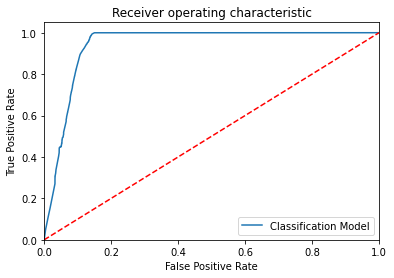

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[17130   351]
 [85317 97202]]
Outcome values : 
 17130 351 85317 97202
Classification report : 
               precision    recall  f1-score   support

           1       0.17      0.98      0.29     17481
           0       1.00      0.53      0.69    182519

    accuracy                           0.57    200000
   macro avg       0.58      0.76      0.49    200000
weighted avg       0.92      0.57      0.66    200000

Accuracy : 57.2 %
Precision : 16.7 %
Recall : 98.0 %
F1 Score : 0.286
Specificity or True Negative Rate : 53.3 %
Balanced Accuracy : 75.6 %
MCC : 0.731
roc_auc_score: 0.756


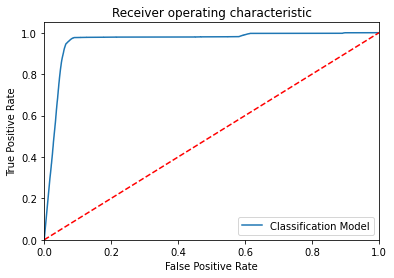

-----------------------------------------------------------------------------------------------------


In [15]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)

modelBAG = BaggingClassifier(base_estimator=None, n_estimators=100, max_samples=1.0, max_features=1.0,
                             bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False,
                             n_jobs=None, random_state=None, verbose=0)

ModelGB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, 
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, 
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                     min_impurity_split=None, init=None, random_state=None,
                                     max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
ModelLGB = lgb.LGBMClassifier()
ModelGNB = GaussianNB()

# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN,modelBAG, ModelGB, ModelLGB, ModelGNB]
for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    if(mx<0):
        mx=-mx
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive' : tp, 
               'False_Negative' : fn, 
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    EMResults = EMResults.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------

In [16]:
EMResults

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),15316,2165,9363,173156,0.942,0.621,0.876,0.727,0.949,1.222,0.912426,0.912
1,DecisionTreeClassifier(),17449,32,28730,153789,0.856,0.378,0.998,0.548,0.843,1.306,0.920381,0.920
2,"(DecisionTreeClassifier(max_features='auto', r...",17478,3,28866,153653,0.856,0.377,1.000,0.548,0.842,1.299,0.920837,0.921
3,"(ExtraTreeClassifier(random_state=515559521), ...",17462,19,28394,154125,0.858,0.381,0.999,0.551,0.844,1.328,0.921673,0.922
4,KNeighborsClassifier(),17408,73,27954,154565,0.860,0.384,0.996,0.554,0.847,1.355,0.921334,0.922
5,(DecisionTreeClassifier(random_state=420533973...,17480,1,28902,153617,0.855,0.377,1.000,0.547,0.842,1.297,0.920796,0.921
6,([DecisionTreeRegressor(criterion='friedman_ms...,17397,84,28136,154383,0.859,0.382,0.995,0.552,0.846,1.343,0.920520,0.920
7,LGBMClassifier(),17476,5,29251,153268,0.854,0.374,1.000,0.544,0.840,1.276,0.919726,0.920
8,GaussianNB(),17130,351,85317,97202,0.572,0.167,0.980,0.286,0.533,0.731,0.756240,0.756


In [17]:
EMResults.to_csv('C:\\Users\\phani\\OneDrive\\Documents\\Machine learning internship\\Project\\ProjectSubmission.csv')
EMResults

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),15316,2165,9363,173156,0.942,0.621,0.876,0.727,0.949,1.222,0.912426,0.912
1,DecisionTreeClassifier(),17449,32,28730,153789,0.856,0.378,0.998,0.548,0.843,1.306,0.920381,0.920
2,"(DecisionTreeClassifier(max_features='auto', r...",17478,3,28866,153653,0.856,0.377,1.000,0.548,0.842,1.299,0.920837,0.921
3,"(ExtraTreeClassifier(random_state=515559521), ...",17462,19,28394,154125,0.858,0.381,0.999,0.551,0.844,1.328,0.921673,0.922
4,KNeighborsClassifier(),17408,73,27954,154565,0.860,0.384,0.996,0.554,0.847,1.355,0.921334,0.922
5,(DecisionTreeClassifier(random_state=420533973...,17480,1,28902,153617,0.855,0.377,1.000,0.547,0.842,1.297,0.920796,0.921
6,([DecisionTreeRegressor(criterion='friedman_ms...,17397,84,28136,154383,0.859,0.382,0.995,0.552,0.846,1.343,0.920520,0.920
7,LGBMClassifier(),17476,5,29251,153268,0.854,0.374,1.000,0.544,0.840,1.276,0.919726,0.920
8,GaussianNB(),17130,351,85317,97202,0.572,0.167,0.980,0.286,0.533,0.731,0.756240,0.756


In [18]:
y_pred=ModelLR.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [19]:
Results = pd.DataFrame({'Fraud_A':y_test, 'Fraud_P':y_pred})

# Merge two Dataframes on index of both the dataframes

ResultsFinal = m_bk.merge(Results, left_index=True, right_index=True)
ResultsFinal.sample(10)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud,Fraud_A,Fraud_P
330844,36.136208,7.775110,0.142572,1,0,0,0,0,0,0
677634,8.930605,0.063378,0.134889,1,1,0,1,0,0,0
71892,8.716785,1.965606,6.521946,1,0,0,1,1,1,1
812247,1.812427,2.644002,1.024251,0,0,1,1,0,0,0
835620,16.662895,0.407103,1.307238,1,0,0,1,0,0,0
495981,3.235138,6.394951,2.611106,1,1,0,0,0,0,0
466957,14.102530,0.171795,0.457124,1,0,0,0,0,0,0
676774,9.186986,3.782464,4.949645,1,1,0,1,1,1,1
580606,3.629559,4.290862,1.188935,1,1,0,1,0,0,0
306864,3.061687,2.086014,0.527994,1,0,0,1,0,0,0
